In [1]:
import pandas as pd
import seaborn as sns


In [3]:
# load filr and unneeeded column
df = pd.read_csv('data/SalesDeaths.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df = df.query("Location == 'Missouri'")

NameError: name 'plt' is not defined

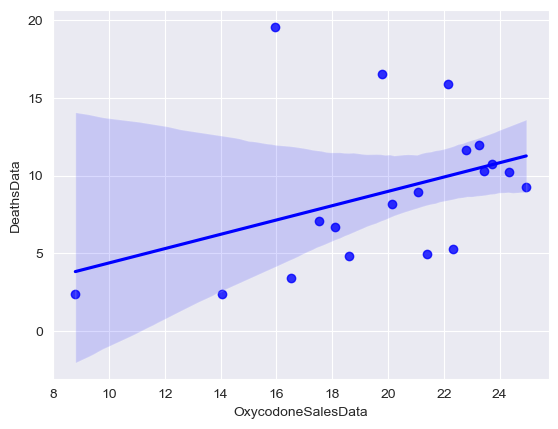

In [6]:
# linear regression to check relationship between x and y
sns.set_style("darkgrid")
sns.color_palette("rocket")
sns.regplot(x="OxycodoneSalesData", y="DeathsData", data=df, color='blue')
plt.title("Oxycodone Sales and deaths with outliers")

Text(0.5, 1.0, 'Hydrocodone Sales and deaths with outliers')

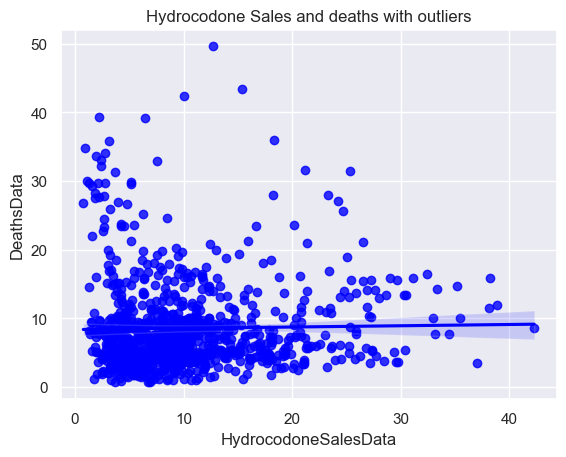

In [12]:
# linear regression to check relationship between x and y
sns.set_style("darkgrid")
sns.color_palette("rocket")
sns.regplot(x="HydrocodoneSalesData", y="DeathsData", data=df, color='blue')
plt.title("Hydrocodone Sales and deaths with outliers")

<Axes: xlabel='DeathsData'>

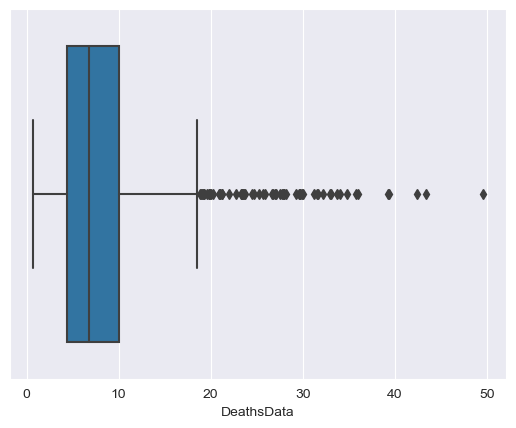

In [60]:
# check for outliers
sns.boxplot(x=df["DeathsData"])

<Axes: xlabel='SalesData'>

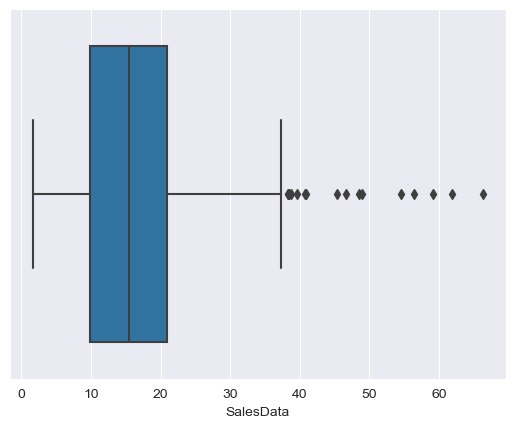

In [61]:
sns.boxplot(x=df["SalesData"])

In [9]:
# define 95% of samples
percentile_95_deaths = df['DeathsData'].quantile(0.95)
percentile_95_sales = df['SalesData'].quantile(0.95)
print(percentile_95_deaths)
print(percentile_95_sales)

13.635279999999996
26.243467499999994


In [5]:
# remove 5% of samples
df = pd.read_csv('data/SalesDeaths.csv')
df1 = df.query('DeathsData < 16 & OxycodoneSalesData < 29')
df1 = df.query("Location == 'Michigan'")


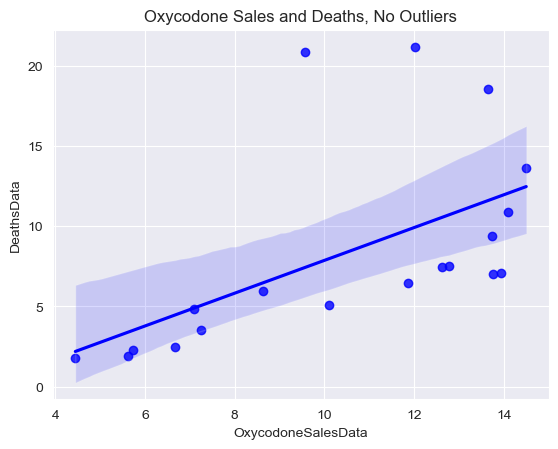

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Plot the regression plot for the filtered data
sns.regplot(x='OxycodoneSalesData', y='DeathsData', data=df1, color='blue', label='lala')
# Add a title to the graph
plt.title('Oxycodone Sales and Deaths, No Outliers')
# Display the plot
plt.show()


In [7]:
import pandas as pd
# Calculate the correlation coefficient
correlation = df1['OxycodoneSalesData'].corr(df1['DeathsData'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.5694047448113194


In [37]:
df_test = df[["Fips","Location","TimeFrame","SalesData","DeathsData"]]
df_test

#df

,Fips,Location,TimeFrame,SalesData,DeathsData
0,1,Alabama,2000,6.74399,0.98993
1,1,Alabama,2001,7.79399,1.29709
2,1,Alabama,2002,7.80123,1.61198
3,1,Alabama,2003,9.26128,1.10769
4,1,Alabama,2004,9.10411,1.84700
...,...,...,...,...,...
964,56,Wyoming,2014,20.63788,9.29636
965,56,Wyoming,2015,21.83413,7.89044
966,56,Wyoming,2016,20.73213,8.74569
967,56,Wyoming,2017,18.12706,8.73564
